# Epidemic evolution plots

In [78]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

## Updated data

In [ ]:
url = "https://brasil.io/dataset/covid19/caso/?format=csv"
filename = 'data/brazil_' + url.split("/")[-3] + '.csv'
with open(filename, "wb") as f:
    r = requests.get(url)
    f.write(r.content)

## Plot Brazil

We plot using data until May 17, 2020.

In [90]:
filename = 'data/brazil_covid19_05_17.csv'

df = pd.read_csv(filename)
df.head()

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-05-17,AL,Anadia,city,5,1,True,17545.0,2700201.0,28.49815,0.2000
1,2020-05-17,AL,Arapiraca,city,130,6,True,231747.0,2700300.0,56.09566,0.0462
2,2020-05-17,AL,Atalaia,city,29,1,True,47185.0,2700409.0,61.46021,0.0345
3,2020-05-17,AL,Barra de Santo Antônio,city,3,0,True,15932.0,2700508.0,18.83003,0.0000
4,2020-05-17,AL,Barra de São Miguel,city,9,0,True,8322.0,2700607.0,108.14708,0.0000


In [91]:
state_or_city = 'state'
df = df[ df['place_type'] == state_or_city]

In [92]:
df

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
83,2020-05-17,AL,NaN,state,3816,210,True,3337357.0,27.0,114.34198,0.0550
144,2020-05-17,AM,NaN,state,20328,1413,True,4144597.0,13.0,490.46988,0.0695
162,2020-05-17,AP,NaN,state,3952,119,True,845731.0,16.0,467.28806,0.0301
382,2020-05-17,BA,NaN,state,8443,295,True,14873064.0,29.0,56.76705,0.0349
559,2020-05-17,CE,NaN,state,24255,1641,True,9132078.0,23.0,265.60220,0.0677
...,...,...,...,...,...,...,...,...,...,...,...
88942,2020-02-29,SP,NaN,state,2,0,False,45919049.0,35.0,0.00436,0.0000
88944,2020-02-28,SP,NaN,state,2,0,False,45919049.0,35.0,0.00436,0.0000
88946,2020-02-27,SP,NaN,state,1,0,False,45919049.0,35.0,0.00218,0.0000
88948,2020-02-26,SP,NaN,state,1,0,False,45919049.0,35.0,0.00218,0.0000


In [93]:
df_BRA = df.groupby('date')[['confirmed', 'deaths']].sum()
df_BRA.index = pd.to_datetime(df_BRA.index)

In [94]:
df_BRA

,confirmed,deaths
date,,
2020-02-25,1,0
2020-02-26,1,0
2020-02-27,1,0
2020-02-28,2,0
2020-02-29,2,0
...,...,...
2020-05-13,191038,13281
2020-05-14,205172,14070
2020-05-15,211635,14601


In [95]:
df_BRA.index

DatetimeIndex(['2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03',
               '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07',
               '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13', '2020-03-14', '2020-03-15',
               '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
               '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23',
               '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
               '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31',
               '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04',
               '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12',
               '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16',
               '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20',
      

In [96]:
df_BRA_ = df_BRA[ df_BRA['deaths'] > 0]

In [97]:
import matplotlib.dates as mdates

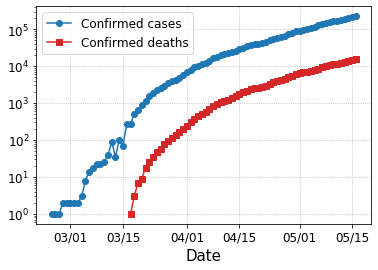

In [100]:
fig, ax = plt.subplots()

ax.plot(df_BRA['confirmed'][:-1], 'o-', color= 'C0', label= 'Confirmed cases')
ax.plot(df_BRA_['deaths'][:-1], 's-', color= 'C3', label= 'Confirmed deaths')
ax.set_yscale('log')
ax.grid(linestyle=':')
ax.set_xlabel('Date', fontsize= 15)
ax.tick_params(axis='x', labelsize= 12)
ax.tick_params(axis='y', labelsize= 12)

# Define the date format
date_form = DateFormatter("%m/%d")
ax.xaxis.set_major_formatter(date_form)

plt.legend(fontsize= 12)
#filename = 'results/figures/FIGURE_DATA_BRASIL' + '_fit_until_' + fit_until
#plt.savefig(filename + '.pdf', bbox_inches='tight')
plt.show()

## Plot São Paulo State and São Paulo city


We plot using data until May 17, 2020.

In [101]:
filename = 'data/brazil_covid19_05_17.csv'

df = pd.read_csv(filename)
df.head()

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population_2019,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-05-17,AL,Anadia,city,5,1,True,17545.0,2700201.0,28.49815,0.2000
1,2020-05-17,AL,Arapiraca,city,130,6,True,231747.0,2700300.0,56.09566,0.0462
2,2020-05-17,AL,Atalaia,city,29,1,True,47185.0,2700409.0,61.46021,0.0345
3,2020-05-17,AL,Barra de Santo Antônio,city,3,0,True,15932.0,2700508.0,18.83003,0.0000
4,2020-05-17,AL,Barra de São Miguel,city,9,0,True,8322.0,2700607.0,108.14708,0.0000


In [102]:
state_or_city = 'city'

name = 'São Paulo'

df_city = df[ df['place_type'] == state_or_city]
df_city = df_city[ df_city[state_or_city] == name ]

df_city = df_city.groupby('date')[['confirmed']].sum()
df_city.index = pd.to_datetime(df_city.index)

In [103]:
state_or_city = 'state'

name = 'SP'

df_state = df[ df['place_type'] == state_or_city]
df_state = df_state[ df_state[state_or_city] == name ]

df_state = df_state.groupby('date')[['confirmed']].sum()
df_state.index = pd.to_datetime(df_state.index)

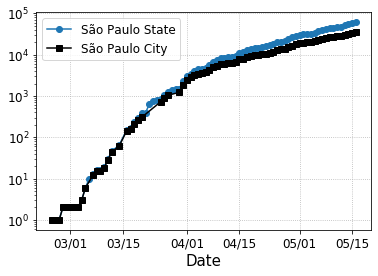

In [117]:
fig, ax = plt.subplots()

ax.plot(df_state['confirmed'][:-1], 'o-', color= 'C0', label= 'São Paulo State')
ax.plot(df_city['confirmed'][:-1], 's-', color= 'black', label= 'São Paulo City')
ax.set_yscale('log')
ax.grid(linestyle=':')
ax.set_xlabel('Date', fontsize= 15)
ax.tick_params(axis='x', labelsize= 12)
ax.tick_params(axis='y', labelsize= 12)

# Define the date format
date_form = DateFormatter("%m/%d")
ax.xaxis.set_major_formatter(date_form)

plt.legend(fontsize= 12)
#filename = 'results/figures/___2FIGURE_DATA_SP_CASES' + '_fit_until_' + fit_until
#plt.savefig(filename + '.png', bbox_inches='tight')
plt.show()